# Lab No 3 - Geovisualization Techniques - Data Viz

# Challenge 1

In [7]:
#cd UA2

/Users/milliemccallum/Documents/UA2


In [8]:
# Import data and preprocessing steps taken from the example
import pandas as pd

listings =pd.read_csv("Data/Data_lab3/data-2/listings.csv")

#Show column headings
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9784567,https://www.airbnb.com/rooms/9784567,20160704013910,2016-07-04,nice Room in Amsterdam,nice Room 20 Min.to Amst.center 10 minutes wal...,NaN,nice Room 20 Min.to Amst.center 10 minutes wal...,none,nice Park metro in front bus in front,...,8.0,f,NaN,Amsterdam,f,flexible,f,f,3,0.81
1,13163805,https://www.airbnb.com/rooms/13163805,20160704013910,2016-07-04,Best cost benefit room near a metro station,We (me and my wife) are constantly improving o...,NaN,We (me and my wife) are constantly improving o...,none,NaN,...,9.0,f,NaN,Amsterdam,t,flexible,f,f,1,4.00
2,3719167,https://www.airbnb.com/rooms/3719167,20160704013910,2016-07-04,Nice room in A´dam SE near nature & heart centre,I offer a beautiful 19 sqm room in a house on ...,"The location is close to the shops, public tra...",I offer a beautiful 19 sqm room in a house on ...,none,A lot of different internationalities and cult...,...,9.0,f,NaN,Amsterdam,f,moderate,f,f,1,0.48
3,13188367,https://www.airbnb.com/rooms/13188367,20160704013910,2016-07-04,Private room 15min metro ride from city center,The apartment is located a 15min ride from the...,NaN,The apartment is located a 15min ride from the...,none,NaN,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.62
4,4831606,https://www.airbnb.com/rooms/4831606,20160704013910,2016-07-04,Room in Amsterdam in a new house!! Free Bicycle,In Amsterdam Zuidoost (20 minutes to central s...,Smart tv,In Amsterdam Zuidoost (20 minutes to central s...,none,NaN,...,9.0,f,NaN,Amsterdam,f,moderate,f,f,1,0.65


In [9]:
# Subset data
subset_listings = listings[['id', 
                            'neighbourhood_cleansed',
                            'latitude',
                            'longitude',
                            'property_type',
                            'room_type',
                            'bedrooms',
                            'price',
                            'number_of_reviews']]

# Clean data
subset_listings.loc[subset_listings.index, 'price'] = subset_listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Remove any records that are not complete
subset_listings = subset_listings.dropna()

In [11]:
#Challenge 1

# define the function with variable x
def data_description (x): 
    
    stats = x.select_dtypes(include='number')
    #only include columns with a datatype that is numerical

    stats_dict = {'M': stats.mean(), 'S': len(stats)}
    # create a new dictionary with two new columns for mean and count that the stats subset will go into
    
    stats_pd = pd.DataFrame(stats_dict)
    # make this new dictionary into a pandas dataframe

    stats_pd.columns = ['Mean', 'Count']
    # rename columns 
    
    return stats_pd

# call the function to return a table of the results
result = data_description(subset_listings)
result

,Mean,Count
id,7.418371e+06,13837
latitude,5.236557e+01,13837
longitude,4.889060e+00,13837
bedrooms,1.428344e+00,13837
number_of_reviews,1.541693e+01,13837


# Challenge 2

Question 1:

The problem I am investigating is the availability of bike parking in edinburgh and its distribution throughout the city centre. Additionally, the role of the bike park capacity plays a key role in assessing its distribution and the suitability of current bit parking capacity. This is especially important in cities at the moment given the push to reduce emissions, and subsequent growth in the popularity of cycling in recent years as an "environmentally friendly" mode of transport

In [14]:
# uploading the data using an api in geojson format to a gpd
# the data is taken from: https://data.edinburghcouncilmaps.info/datasets/cityofedinburgh::cycle-parking-1/about
import geopandas as gpd

cycle_api = gpd.read_file("https://services-eu1.arcgis.com/FgpikkYuSUOuITxp/arcgis/rest/services/Cycle_Parking/FeatureServer/46/query?outFields=*&where=1%3D1&f=geojson", driver="geojson")

cycle_api.head()

,OBJECTID,eastings,northings,bicycle_pa,capacity,covered,access,fee,operator,CECLand,geometry
0,1,319239,672708,,0,yes,customers,,,,POINT (-3.29451 55.94060)
1,2,322573,674577,stands,16,no,,,,,POINT (-3.24169 55.95794)
2,3,317660,669330,,10,,,,,,POINT (-3.31875 55.90999)
3,4,324248,671834,,0,,,,,,POINT (-3.21410 55.93357)
4,5,325711,673108,stands,8,no,,,City of Edinburgh Council,Y,POINT (-3.19104 55.94524)


In [15]:
# clean the data 
import numpy as np

# select only columns that are relevant 
cycle_subset = cycle_api[["eastings", "northings", "OBJECTID", "bicycle_pa", "capacity", "geometry"]]

# assign empty cells with ' ' value and then remove them from the dataset 
cycle_clean = cycle_subset.replace(' ', np.nan, regex=True)
cycle_subset = cycle_clean.dropna()

cycle_subset.head()

,eastings,northings,OBJECTID,bicycle_pa,capacity,geometry
1,322573,674577,2,stands,16,POINT (-3.24169 55.95794)
4,325711,673108,5,stands,8,POINT (-3.19104 55.94524)
5,326001,672874,6,building,64,POINT (-3.18633 55.94319)
6,318395,671255,7,stands,10,POINT (-3.30758 55.92741)
7,325277,672366,8,stands,6,POINT (-3.19778 55.93851)


In [16]:
# calculating and comparing descriptive statistics for the dataframe 

#mean
mean = cycle_subset['capacity'].mean()
print(mean)

#standard deviation
std = cycle_subset['capacity'].std()
print(std)

#median
median = cycle_subset['capacity'].median()
print(median)

12.29721595184349
17.49194306137876
8.0


In [19]:
# using groupby to compare the capacity of different cycle parking types
capacity_by_type = cycle_subset.groupby('bicycle_pa')['capacity'].mean().reset_index()
capacity_by_type

# from this we can see artistic bike parks have the mean largest capacity 
# to gather further information on this, the next line of code identifies what is the most common

,bicycle_pa,capacity
0,anchors,5.250000
1,artistic,82.000000
2,bollard,2.000000
3,building,52.100000
4,front_wheel,7.000000
5,ground_slots,10.666667
6,hoop,2.000000
7,lockers,7.400000
8,post_hoop,2.000000
9,rack,16.340426


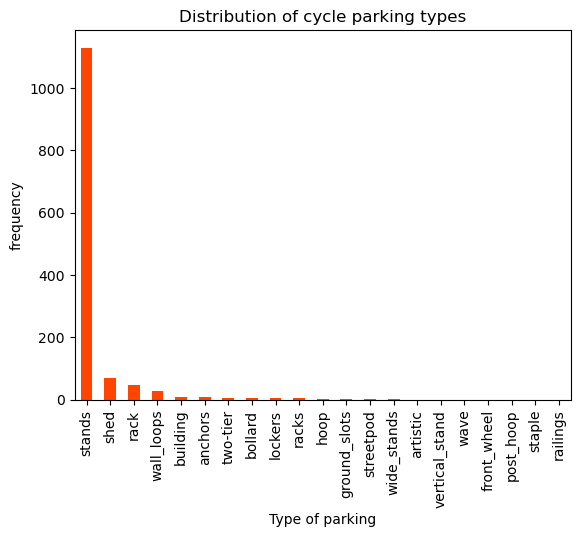

In [20]:
# bar chart of parking type 

import matplotlib.pyplot as plt

cycle_subset['bicycle_pa'].value_counts().plot(kind='bar', color='#FF4500')
plt.title('Distribution of cycle parking types')
plt.xlabel('Type of parking')
plt.ylabel('frequency')
plt.show()

# this finds that stands are the most common type of cycle parking in Edinburgh.
# However, using the information from the groupby() assessment, these do not have a particularly large capacity with 11.6 on average

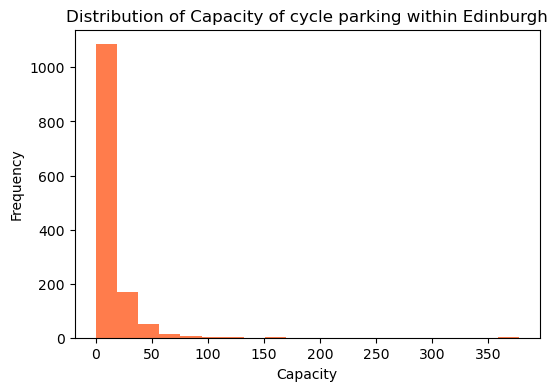

In [22]:
# making a histogram of capacity of cycle parking and frequency


plt.figure(figsize=(6, 4))
cycle_subset['capacity'].plot(kind='hist', bins=20, color='#FF4500', alpha=0.7)
plt.title('Distribution of Capacity of cycle parking within Edinburgh')
plt.xlabel('Capacity')
plt.ylabel('Frequency')
plt.show()

# this shows a postiviely skewed distribution where most stands have a small capacity and very few with a high capacity

<Figure size 1800x1000 with 0 Axes>

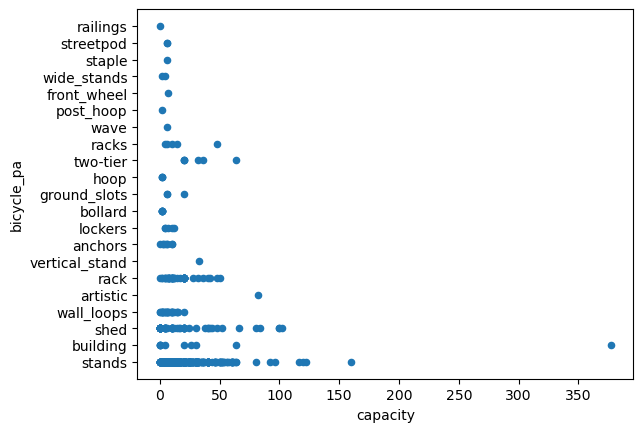

In [24]:
# bivariate plot

plt.figure(figsize=(18,10))
cycle_subset.plot(x='capacity', y='bicycle_pa', kind='scatter')
plt.show()
# this shows that the building type has an outlier with the highest capacity and stands are very common in the lower capacity

In [25]:
print(cycle_subset.crs)

EPSG:4326


In [26]:
# explore spatial distribution of the data

cycle_subset.explore()
# initial exploration shows that cycle parking is mainly distributed in the city centre of Edinburgh, as well as 
#a strong cluster extending into the Leith area

In [29]:
# read a file of edinburgh's neighbourhood areas to help better analyse spatial patters
# this file is taken from: https://data.edinburghcouncilmaps.info/datasets/cityofedinburgh::natural-neighbourhoods-1/about


neighbourhoods = gpd.read_file("Data/Data_lab3/Natural_Neighbourhoods.geojson", driver="GeoJSON")
neighbourhoods.head()

,OBJECTID,NATURALCOM,OID_,CNT_NATURA,DUMMY_,SUM_ELECNO,Z009_ELEC,Shapearea,Shapelen,geometry
0,1,Brunstane/Gilberstoun,1485,1485,1485,1485.30,1485,1.147451e+06,4629.409487,"POLYGON ((-3.10276 55.94435, -3.10276 55.94435..."
1,2,Newcraighall,262,262,262,261.77,262,4.414281e+05,3515.734273,"MULTIPOLYGON (((-3.09979 55.93598, -3.09855 55..."
2,3,Magdalene,1479,1479,1479,1478.53,1479,3.119711e+05,2590.027278,"POLYGON ((-3.10240 55.94088, -3.10245 55.94165..."
3,4,Newbridge,327,327,327,326.84,327,5.567828e+06,11661.263206,"POLYGON ((-3.41296 55.95159, -3.41414 55.95153..."
4,5,Cammo/Strathalmond,874,874,874,873.59,874,2.008664e+06,7150.150690,"POLYGON ((-3.33979 55.96428, -3.34210 55.96406..."


In [32]:
# cleaning the neighbourhoods gdf by only including necessary columns
neighbourhoods_clean = neighbourhoods[["OBJECTID", "NATURALCOM", "geometry"]]

# create a spatial join between the cycle_subset and the new neighbourhoods gdf
spatial_join = cycle_subset.sjoin(neighbourhoods_clean, how="inner", predicate="intersects")
spatial_join.head()

,eastings,northings,OBJECTID_left,bicycle_pa,capacity,geometry,index_right,OBJECTID_right,NATURALCOM
1,322573,674577,2,stands,16,POINT (-3.24169 55.95794),78,79,Craigleith
4,325711,673108,5,stands,8,POINT (-3.19104 55.94524),90,91,Southside
5,326001,672874,6,building,64,POINT (-3.18633 55.94319),90,91,Southside
6,318395,671255,7,stands,10,POINT (-3.30758 55.92741),106,107,Bankhead
7,325277,672366,8,stands,6,POINT (-3.19778 55.93851),87,88,Marchmont


In [31]:
# create a gdf for the number of cycle parking per neighbourhood

parking_per_neighbourhood = spatial_join.groupby('NATURALCOM').size().reset_index(name='parking_per_neighbourhood')
parking_per_neighbourhood

,NATURALCOM,parking_per_neighbourhood
0,Abbeyhill,6
1,Alnwickhill,2
2,Baberton,1
3,Balerno,5
4,Balgreen/Saughtonhall,5
...,...,...
123,Turnhouse,2
124,Wardie Bay,2
125,Warriston,2
126,West End,14


In [33]:
# focusing on a specific neighbourhood

filtered_row = spatial_join[spatial_join['NATURALCOM'] =="New Town"]
filtered_row.explore()

# New Town was chosen as it is the CBD of edinburgh and based on analysis of the inital map, 
#there is a high concentration in this area. The CBD is likely one of the most frequently used
#and visited areas of Edinburgh therefore it is an interesting neighbourhood to study

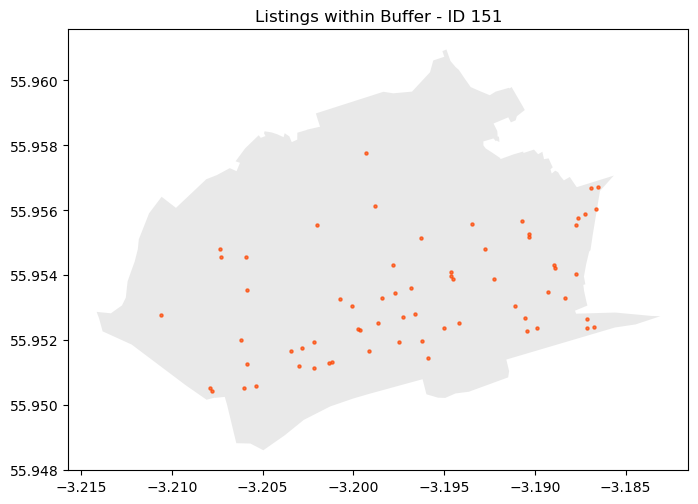

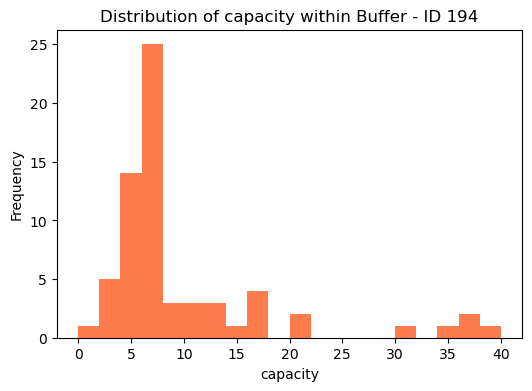

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# Plot the buffer area with its cycle parking locations
filtered_area = neighbourhoods[neighbourhoods['NATURALCOM'] == "New Town"].plot(ax=ax, color="#D4D4D4", alpha=0.5)

# Overlay all of the parking locations with the outline of the New Town boundary
filtered_row.plot(ax=ax, marker='o', color="#FF4500", markersize=5, alpha=0.7)

# Imporve the presentation of the plot
ax.set_title("Listings within Buffer - ID 151")
plt.show()

# Plot a histogram of the 'capacity' attribute
plt.figure(figsize=(6, 4))
filtered_row['capacity'].plot(kind='hist', bins=20, color='#FF4500', alpha=0.7)
plt.title('Distribution of capacity within Buffer - ID 194')
plt.xlabel('capacity')
plt.ylabel('Frequency')
plt.show()

# the above plot shows that while there are a large number of cycle parking units in New Town, the majority have a small
#capacity with only 5 extending past a capacity of 20. Theefore while there may appear to be
#a large number of parking available, this is within the extent of a limited capacity

In [37]:
# import the necessary libraries
import folium
from folium import plugins
from folium.plugins import MeasureControl
from branca.colormap import linear
from branca import colormap
from branca import colormap as cm

In [43]:
# plot a heat map using folium showing the distribution of cycle parking accross edinburgh
# info taken from: https://geopandas.org/en/stable/gallery/plotting_with_folium.html


map = folium.Map(location=[55.96, 3.1883], tiles="OpenStreetMap", zoom_start=6)

cycle_heat_map = [[point.xy[1][0], point.xy[0][0]] for point in cycle_subset.geometry]

cycle_heat_map
plugins.HeatMap(cycle_heat_map).add_to(map)

map

this shows that there is a high concentration of cycle points around the new and old town of edinburgh, reflective of this being one of the more central and busiest areas of the city

# Challenge 3

In [44]:
crash_data = pd.read_csv("Data/Data_lab3/Motor_Vehicle_Collisions_-_Crashes_20250223.csv")
crash_data.head()

# api data could only be downloaded with 1000 rows, therefore I downloaded the csv file into my data lab 3 folder

/var/folders/d1/m4w3nsnj6k5_lmftsj71l4j40000gn/T/ipykernel_5846/3178698092.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_data = pd.read_csv("Data/Data_lab3/Motor_Vehicle_Collisions_-_Crashes_20250223.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [45]:
crash_data.columns
# work out the columns available to allow for cleaning the dataset 


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [46]:
# create a subset to remove problematic or irrelevant columns

crash_clean = crash_data[['CRASH DATE', 'LATITUDE',
                           'LONGITUDE', 'LOCATION',
                           'NUMBER OF PERSONS INJURED',
                           'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
                           'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
                           'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
                           'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
                           'COLLISION_ID']]

In [47]:
# remove any null values from the lat or long columns and assign an id to each crash

subset_crash = crash_clean.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [48]:
# make into a gdf
import geopandas as gpd

geometry = gpd.points_from_xy(subset_crash['LONGITUDE'], subset_crash['LATITUDE'])
crash_gdf = gpd.GeoDataFrame(subset_crash, geometry=geometry, crs='EPSG:4326')
crash_gdf.head()

,CRASH DATE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,geometry
2,11/01/2023,40.621790,-73.970024,"(40.62179, -73.970024)",1.0,0.0,0,0,0,0,1,0,Unspecified,4675373,POINT (-73.97002 40.62179)
9,09/11/2021,40.667202,-73.866500,"(40.667202, -73.8665)",0.0,0.0,0,0,0,0,0,0,Unspecified,4456314,POINT (-73.86650 40.66720)
10,12/14/2021,40.683304,-73.917274,"(40.683304, -73.917274)",0.0,0.0,0,0,0,0,0,0,NaN,4486609,POINT (-73.91727 40.68330)
12,12/14/2021,40.709183,-73.956825,"(40.709183, -73.956825)",0.0,0.0,0,0,0,0,0,0,Passing Too Closely,4486555,POINT (-73.95682 40.70918)
13,12/14/2021,40.868160,-73.831480,"(40.86816, -73.83148)",2.0,0.0,0,0,0,0,2,0,Unspecified,4486660,POINT (-73.83148 40.86816)


In [49]:
# plot the data using lonboard 

from lonboard import Map, ScatterplotLayer
import seaborn as sns 

layer = ScatterplotLayer.from_geopandas(crash_gdf)
map = Map(layers=[layer], _height=500)
map

Map(custom_attribution='', layers=(ScatterplotLayer(table=arro3.core.Table
-----------
CRASH DATE: Utf8
LATITU…

In [50]:
crash_gdf['NUMBER OF PERSONS KILLED'].unique()
# check for the number of unique categories 

array([ 0.,  1.,  2.,  3.,  4., nan,  8.,  5.])

In [51]:
# get unique categories and generate the colours to be used

categories = crash_gdf['NUMBER OF PERSONS KILLED'].unique()

colors = sns.color_palette("bright")

color_dict = dict(zip(categories, colors))

In [52]:
# create an array to assign each colour a value to match the number of people killed

import numpy as np
color_array = np.array([tuple(np.append(
    np.multiply(
        color_dict.get(x, (0, 0, 0)), 255).astype(int), 255))
                        for x in crash_gdf['NUMBER OF PERSONS KILLED']],
                       dtype=np.uint8)

color_array

array([[  2,  62, 255, 255],
       [  2,  62, 255, 255],
       [  2,  62, 255, 255],
       ...,
       [  2,  62, 255, 255],
       [  2,  62, 255, 255],
       [  2,  62, 255, 255]], dtype=uint8)

In [53]:
# display this on the above map 

layer.radius_scale = 40
layer.opacity = 0.05
layer.get_fill_color = color_array

crash_gdf.total_bounds

# as seen, most of the incidents involved no deaths, therefore there it is difficult to analyse as looks mainly blue

array([-201.35999 ,    0.      ,    0.      ,   43.344444])

In [54]:
cyclist_killed = ScatterplotLayer.from_geopandas(crash_gdf)
map = Map(layers=[cyclist_killed], _height=500)
map

Map(custom_attribution='', layers=(ScatterplotLayer(table=arro3.core.Table
-----------
CRASH DATE: Utf8
LATITU…

In [55]:
# for number of cyclists killed:

categories = crash_gdf['NUMBER OF CYCLIST KILLED'].unique()
colors = sns.color_palette("bright")
color_dict = dict(zip(categories, colors))


color_array = np.array([tuple(np.append(
    np.multiply(
        color_dict.get(x, (0, 0, 0)), 255).astype(int), 255))
                        for x in crash_gdf['NUMBER OF CYCLIST KILLED']],
                       dtype=np.uint8)

color_array

array([[  2,  62, 255, 255],
       [  2,  62, 255, 255],
       [  2,  62, 255, 255],
       ...,
       [  2,  62, 255, 255],
       [  2,  62, 255, 255],
       [  2,  62, 255, 255]], dtype=uint8)

In [56]:
cyclist_killed.radius_scale = 40
cyclist_killed.opacity = 0.05
cyclist_killed.get_fill_color = color_array

crash_gdf.total_bounds

array([-201.35999 ,    0.      ,    0.      ,   43.344444])

In [57]:
# creating an overview of the descriptive statistics for each variable

descriptive_stats = subset_crash.describe()
descriptive_stats

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.917528e+06,1.917528e+06,1.917512e+06,1.917500e+06,1.917528e+06,1.917528e+06,1.917528e+06,1.917528e+06,1.917528e+06,1.917528e+06,1.917528e+06
mean,4.061646e+01,-7.373169e+01,3.219401e-01,1.519166e-03,6.121788e-02,7.686980e-04,2.921783e-02,1.204676e-04,2.269302e-01,5.997305e-04,3.257289e+06
std,2.091131e+00,3.912561e+00,7.056114e-01,4.113498e-02,2.532841e-01,2.831049e-02,1.704420e-01,1.102253e-02,6.645925e-01,2.680064e-02,1.500840e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066752e+01,-7.397466e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.205668e+06
50%,4.072049e+01,-7.392702e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.756164e+06
75%,4.076963e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.273584e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.793962e+06


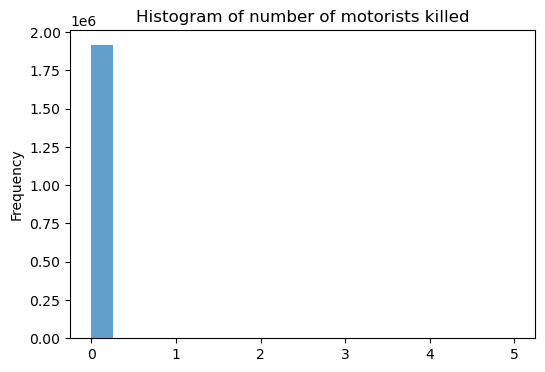

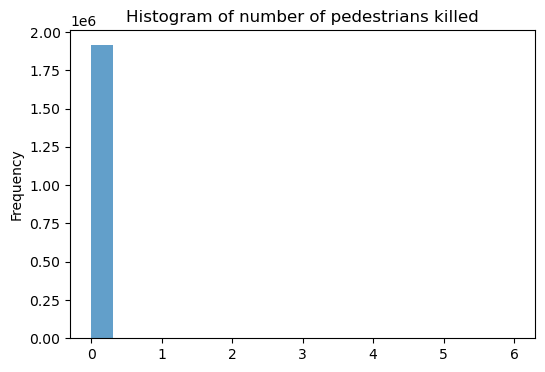

In [58]:
# visualising univariate and bivariate plots
# going to focus on 'NUMBER OF MOTORIST KILLED" AND "NUMBER OF PEDESTRIANS KILLED"

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
subset_crash['NUMBER OF MOTORIST KILLED'].plot(kind='hist', bins=20, alpha =0.7)
plt.title('Histogram of number of motorists killed')
plt.show()

plt.figure(figsize=(6,4))
subset_crash['NUMBER OF PEDESTRIANS KILLED'].plot(kind='hist', bins=20, alpha=0.7)
plt.title('Histogram of number of pedestrians killed')
plt.show()

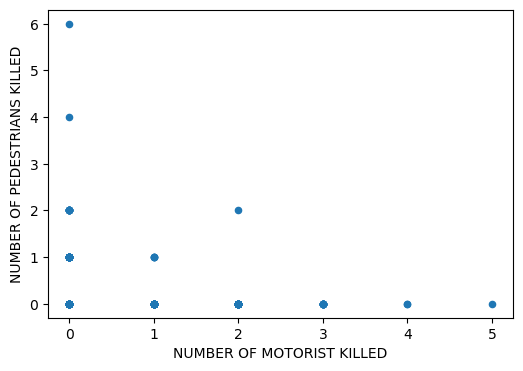

In [59]:
subset_crash.plot(x='NUMBER OF MOTORIST KILLED', y='NUMBER OF PEDESTRIANS KILLED', kind='scatter', figsize=(6,4))
plt.show()

# Challenge 4

Question 1: both londboard and datashader can be used to process large datasets without crashing your computer memory and taking up the ram.
Datashader appears to be more exciting as you can produce high quality visualisations of very large datasets quickly and without much code. It also appears that you can have more control over the output than lonboard.
lonboard is useful for creating basic visual displays of large datasets 

Accessibility of public transport is a key urban issue that all governments are facing. It is important for governments to assess the accessibility of their systems, and mapping these is a key way that this can happen. I have chosen a dataset of public transport in Germany to explore this, where variables including the walking distance of public transport stops have been mapped. 

The data is taken from: 
Maximilian T. Fischer, Daniel Fürst, Yannick Metz, Manuel Schmidt, Julius Rauscher, and Daniel A. Keim. OPTIMAP: A Dataset for Open Public Transport Infrastructure and Mobility Accessibility Profiles. Zenodo, 2025. doi: 10.5281/zenodo.14772646.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
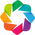

In [64]:
import holoviews as hv, pandas as pd, colorcet as cc
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

In [60]:
# read the parquet file

transport = pd.read_parquet("https://mobility.dbvis.de/data-results/OPTIMAP_v2025-02-01.parquet")

In [61]:
transport.head()

,lat,lng,MinDistanceWalking,scores_OVERALL
0,9.448092,54.790974,77,11.866496
1,9.449389,54.790550,165,11.389042
2,9.449661,54.790798,195,10.581425
3,9.459717,54.787842,343,12.936617
4,9.460062,54.787689,347,12.910222


In [62]:
# explore a smaller portion of the data

first_1000_rows = transport.iloc[:1000]

print(first_1000_rows['MinDistanceWalking'].mean())
print(first_1000_rows['MinDistanceWalking'].std())

267.295
150.76737968731095


In [ ]:
# plot the dataset using hvplot

import hvplot.pandas

map_tiles = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
plot = transport.hvplot(
    'lat',
    'lng', 
    kind='scatter',
    rasterize=True,
    cmap=cc.fire,
    cnorm='eq_hist'
)
map_tiles * plot

In [ ]:
%%time
map_tiles = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points = hv.Points(transport, ['lat', 'lng'])
pub_transport = datashade(points, cmap=cc.fire, width=900, height=480)
map_tiles * pub_transport

In [ ]:
#Importing the required libraries.
import datashader as ds
import hvplot.pandas
import datashader.transfer_functions as tf
from holoviews.operation.datashader import rasterize

#define the datarange and project the number of pixels
canvas = ds.Canvas(plot_width=900, plot_height=480)

In [ ]:
# transformation of the data

canvas.points(transport, 'lat', 'lng', agg=ds.count())

In [ ]:
import numpy as np
np.power(canvas.points(transport, 'lat', 'lng', agg=ds.count()),2)

In [ ]:
import datashader.transfer_functions as tf
tf.set_background(
    tf.shade(
        canvas.points(transport, 'lat', 'lng', agg=ds.count()),
        cmap=cc.fire),
    'black')

In [ ]:
map_tiles = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points = hv.Points(transport, ['lat', 'lng'])
ropts = dict(tools=['hover'], colorbar=True, colorbar_position='bottom', cmap=cc.fire, cnorm='eq_hist')
transport_datas = rasterize(points).opts(**ropts)
map_tiles * transport_datas

This shows that there is a far greater concentration of public transport availability in the South East of Germany as well as the North West. It is clear where cities are located as there is a far greater count some areas, and a network of transport points can be identified. The East of Germany has a low count of public transport availability, therefore attention could be turned to here to increase the connectivity of the country. In addition, by zooming in on specific cities and areas of interest, the places within cities that are the least serviced by public transport can be identified. Maps such as this are important for improving connectivity in cities, especially for initiatives such as improving air quality by reducing the number of cars on the road.

This map could be further improved by including a parameter for the minimum walking distance to the public transport location. This would allow the suitability to be better assessed.

A challenge was encountered as the background ESRI map has not loaded. This is potentially due to the memory of the computer being exceeded or with the projection of the layers